<a href="https://colab.research.google.com/github/Rushabh2499/CodersWeek-ML/blob/master/ML_Day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
%matplotlib inline

In [0]:
dataset = pd.read_csv("http://iali.in/datasets/IEEEAPSIT/unsupervised-ml/Wholesale%20customers%20data.csv")


In [0]:
x = dataset.iloc[:,2:8].values
y = dataset.iloc[:,[0,1]].values

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [36]:
#to check if any value is NA
dataset.isna().head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


In [37]:
# each channel region; find max
dataset[["Channel", "Region", "Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]].groupby(['Channel', 'Region'], as_index=False).max().sort_values(by='Channel', ascending=False)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
3,2,1,20782,28326,39694,8321,19410,6372
4,2,2,27082,25071,67298,11559,38102,3508
5,2,3,44466,73498,92780,8132,40827,16523
0,1,1,56083,23527,16966,18711,5828,6854
1,1,2,32717,16784,13626,60869,1679,5609
2,1,3,112151,43950,21042,36534,6907,47943


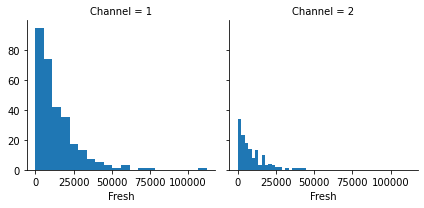

In [38]:
#Fresh vs Channel
g = sns.FacetGrid(dataset, col='Channel')
g.map(plt.hist, 'Fresh', bins=20)

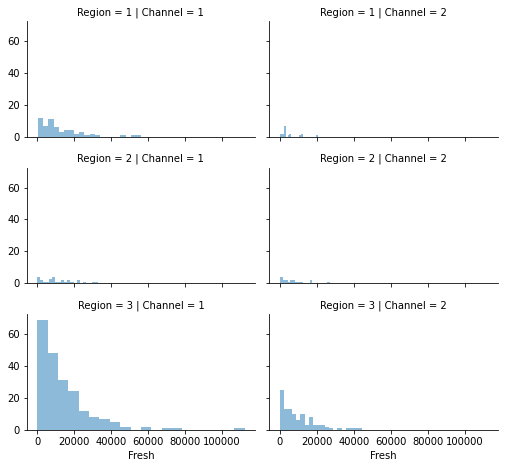

In [39]:
#Plot Fresh vs Channel (Faceted with Region)
grid = sns.FacetGrid(dataset, col='Channel', row='Region', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Fresh', alpha=.5, bins=20)
grid.add_legend();

KMeans Clustering

In [55]:
#cluster for 2 channels
k_means = KMeans(n_clusters=2)
#double iteration
#k_means = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')

k_means.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [56]:

#run the model tracking correct predictions
correct = 0.
for i in range(len(x_train)):
    predict_me = np.array(x_train[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = k_means.predict(predict_me)
    if prediction[0] == y_train[i].all():
        correct += 1

print(correct/len(x_train))

0.08116883116883117


In [57]:
# Normalize parameters in training dataframe X
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x_train)
k_means.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [58]:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [59]:
correct = 0.
for i in range(len(x_train)):
    predict_me = np.array(x_train[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = k_means.predict(predict_me)
    if prediction[0] == y_train[i].all():
        correct += 1

print(correct/len(x_train))

0.9967532467532467
